                                                    LOGISTIC REGRESSION                                                         

Logistic Regression is a supervised machine learning model used to solve classification problems.
Logistic Regression is a type of classification analysis used to predict the outcome of a categorical dependent variable based
on one or more predictor variables. The goal of logistic regression is to estimate the probability of the occurrence
of an event by fitting data to a logistic (cosine) function.

Construction of Logistic Regression :-

1. Linear Combination of Features: The model first computes a weighted sum of the input features plus a bias term

    similar to linear regression: "𝑧 = 𝑤1.𝑥1 + 𝑤2.𝑥2 + ⋯ + 𝑤𝑛.𝑥𝑛 + 𝑏"
where:
- 𝑥1,𝑥2,…,𝑥𝑛: are the input features,
- 𝑤1,𝑤2,…,𝑤𝑛: are the corresponding weights (coefficients),
- b is the bias term.

2. Sigmoid (Logistic) Function: The linear output 𝑧 is then passed through the sigmoid function, which maps any real-valued number into a probability between 0 and 1:
- 𝜎(𝑧)=1/1+𝑒^−𝑧

This probability represents the likelihood that a sample belongs to the positive class (class 1). For example, if 
𝜎(𝑧)=0.8, then the model predicts an 80% probability that the sample belongs to the positive class.

3. Decision Rule: A threshold, typically 0.5, is applied to decide the final classification:
- If 𝜎(𝑧)≥0.5, the model classifies the instance as the positive class (1).
- If σ(z)<0.5, the model classifies the instance as the negative class (0).
we can adjust the threshold if you need a different sensitivity or specificity.

4. Loss Function (Log-Loss): To optimize the model's parameters (weights and bias), logistic regression minimizes a loss function. The most commonly used loss function for logistic regression is log-loss (also called binary cross-entropy):
- 𝐿 = −1/𝑁 ∑[𝑦𝑖.log⁡(𝜎(𝑧𝑖)) + (1− 𝑦𝑖)log(1 - σ(𝑧𝑖))]
where:
- N is the number of samples,
- yi is the actual label for the i-th sample (0 or 1),
- 𝜎(𝑧𝑖) is the predicted probability for the i-th sample.
This loss penalizes incorrect predictions, pushing the model to output probabilities closer to the true labels.

5. Optimization (Gradient Descent)
Logistic regression uses an optimization algorithm, like gradient descent, to minimize the log-loss function by adjusting the weights and bias. It calculates the gradient of the loss function with respect to each weight and updates the weights in the opposite direction of the gradient.

6. Training Process
- Initialize weights (often set to zero or small random values).
- Compute predictions by applying the linear combination of weights and input features to the sigmoid function.
- Calculate the loss using the log-loss function.
- Update weights using gradient descent to minimize the loss.
- Repeat steps 2–4 until the model converges or reaches a set number of iterations.



In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_diabetes
from sklearn import metrics

In [21]:
raw_data = pd.read_csv(r"S:\VS code\python\Data _Analytics\Dataset\loan_data.csv")
raw_data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [12]:
raw_data.shape

(45000, 14)

In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_education                45000 non-null  object 
 2   person_income                   45000 non-null  float64
 3   person_emp_exp                  45000 non-null  int64  
 4   person_home_ownership           45000 non-null  object 
 5   loan_amnt                       45000 non-null  float64
 6   loan_intent                     45000 non-null  object 
 7   loan_int_rate                   45000 non-null  float64
 8   loan_percent_income             45000 non-null  float64
 9   cb_person_cred_hist_length      45000 non-null  float64
 10  credit_score                    45000 non-null  int64  
 11  previous_loan_defaults_on_file  45000 non-null  object 
 12  loan_status                     

In [13]:
raw_data.notnull().count()

person_age                        45000
person_gender                     45000
person_education                  45000
person_income                     45000
person_emp_exp                    45000
person_home_ownership             45000
loan_amnt                         45000
loan_intent                       45000
loan_int_rate                     45000
loan_percent_income               45000
cb_person_cred_hist_length        45000
credit_score                      45000
previous_loan_defaults_on_file    45000
loan_status                       45000
dtype: int64

In [16]:
raw_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [17]:
raw_data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

Data Transformtion

In [22]:
labeledDataset = raw_data.drop(columns=['person_gender'])

In [27]:
label_encoder = LabelEncoder()

labels = ['person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

for label in labels:
    labeledDataset[label] = label_encoder.fit_transform(labeledDataset[label])
labeledDataset

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


Data Visualization

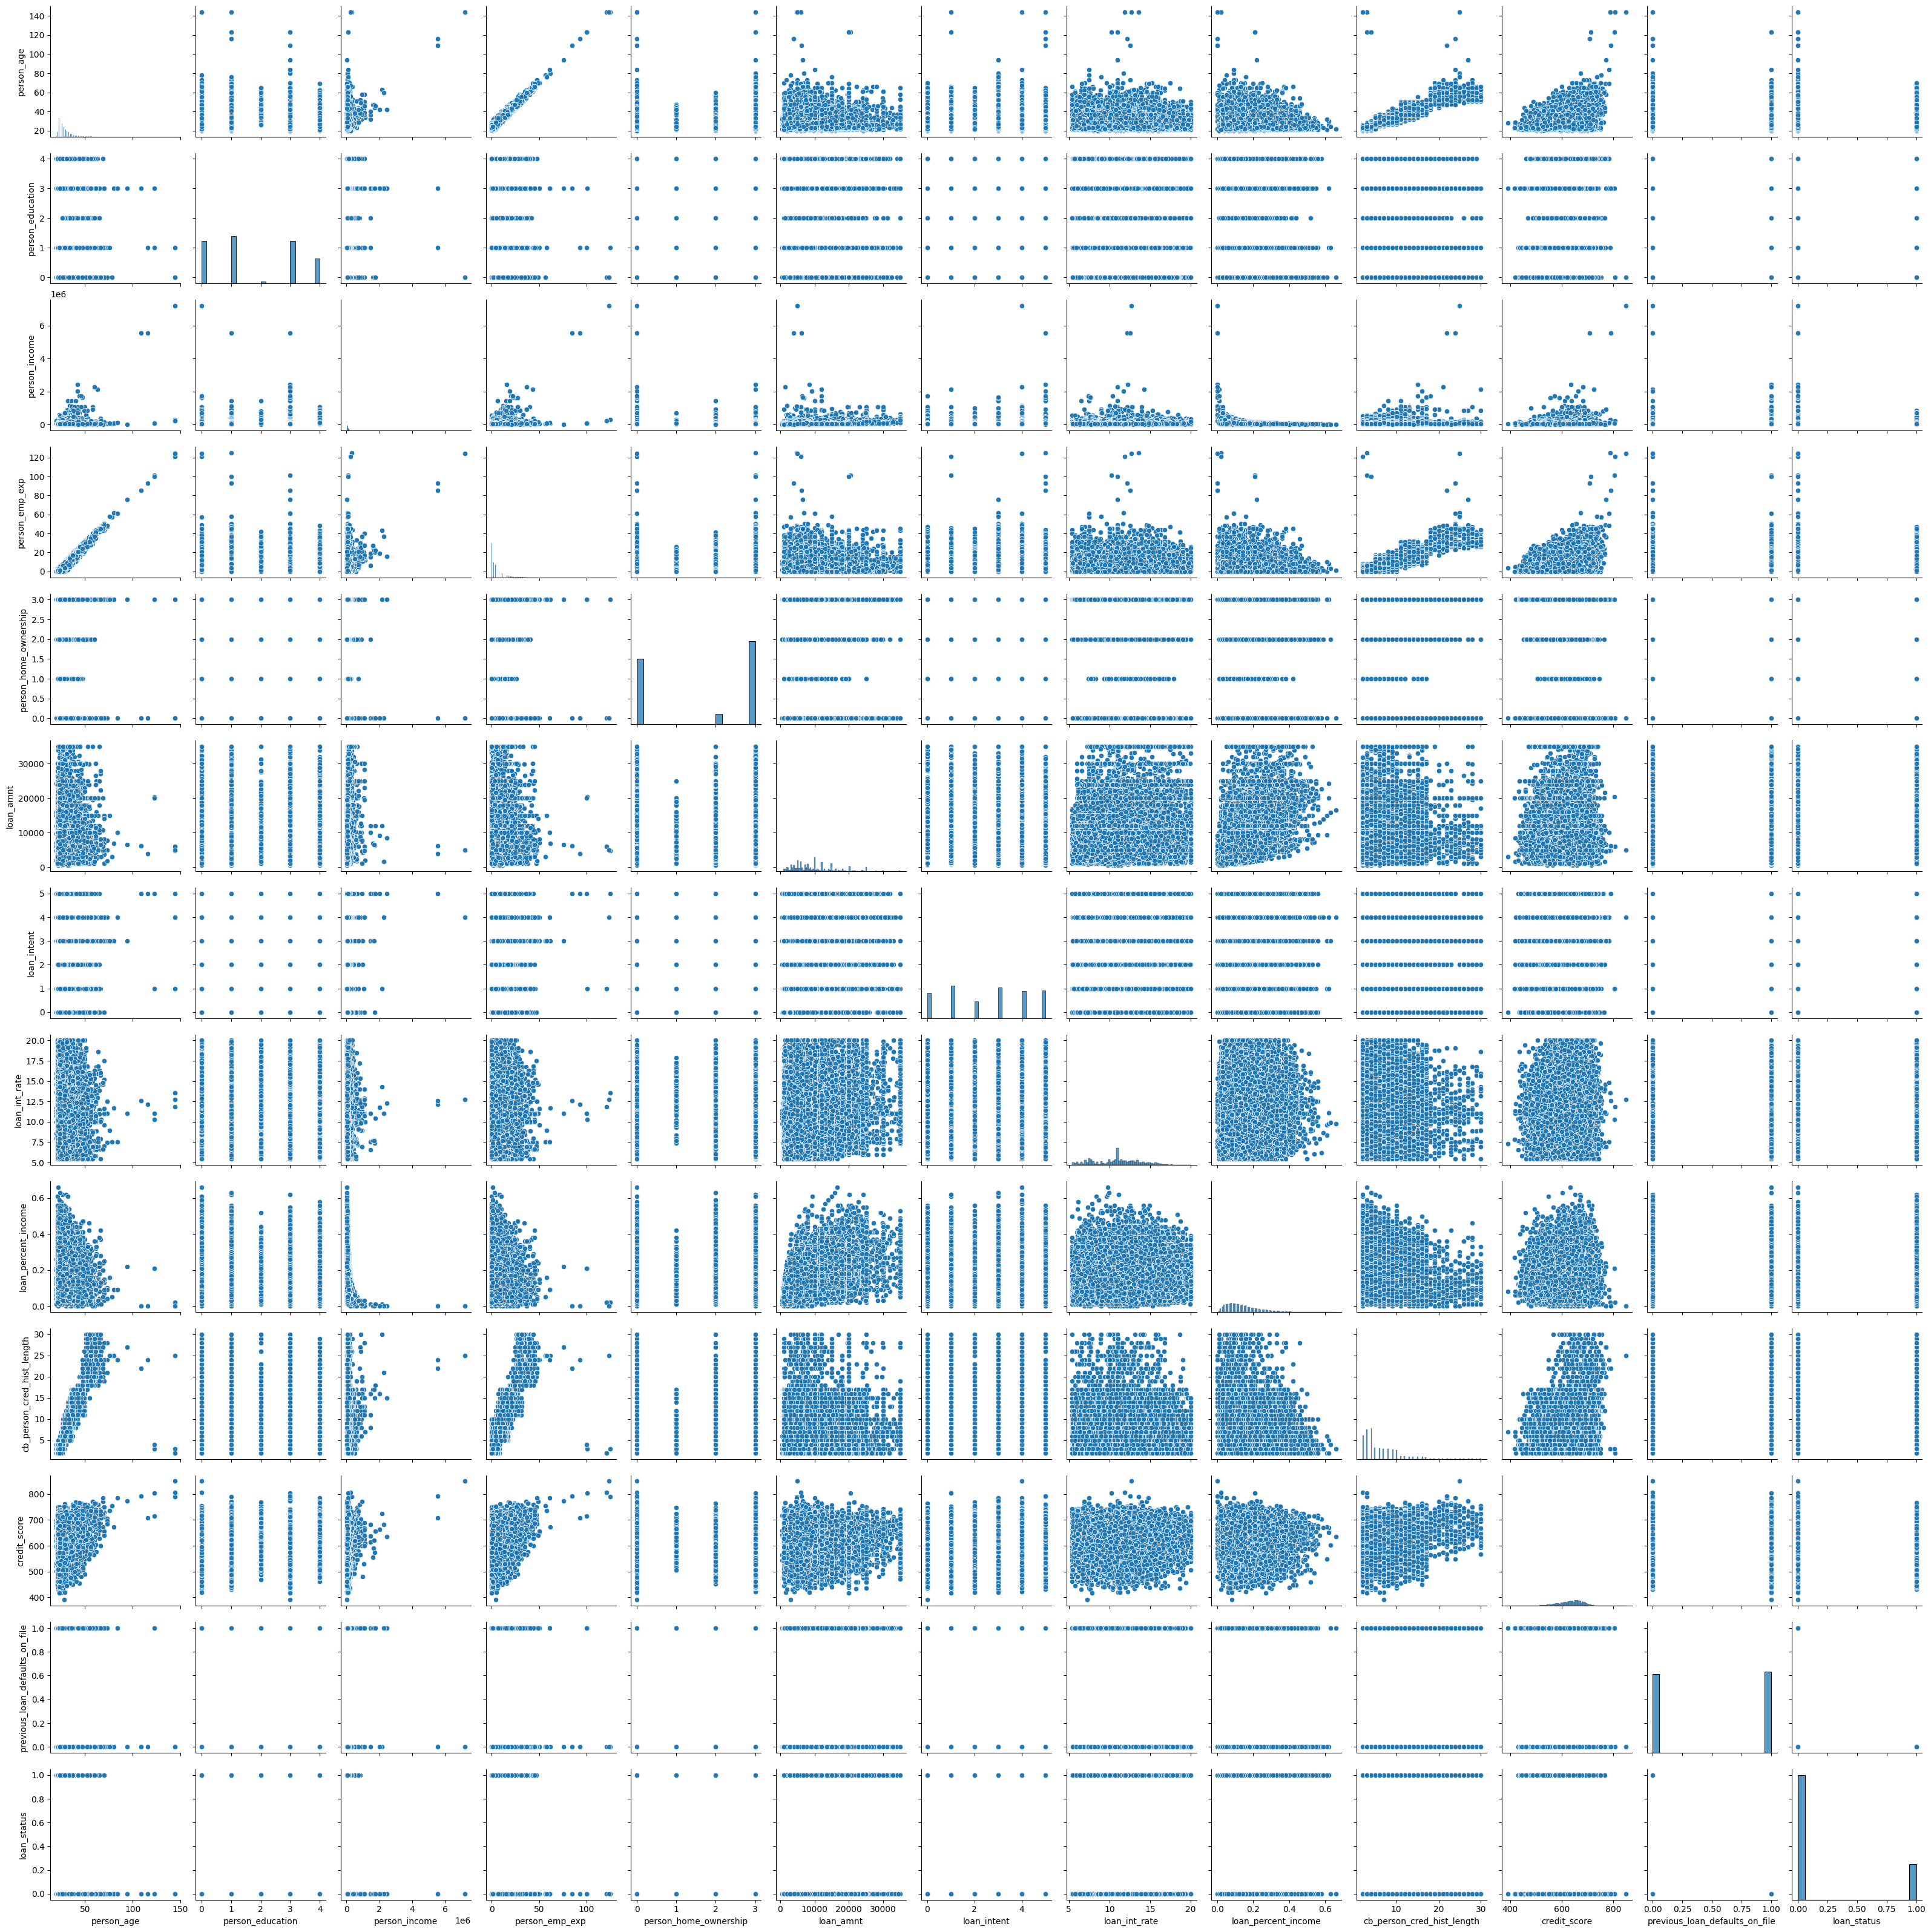

In [28]:
sns.pairplot(labeledDataset)

Making Logistic Model

In [29]:
labeledDataset.columns

Index(['person_age', 'person_education', 'person_income', 'person_emp_exp',
       'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [39]:
x = labeledDataset.iloc[:,:-1]
y = labeledDataset['loan_status']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

In [44]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

c:\Users\SUMIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
predications = logistic_regression.predict(x_test)
predications

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Metrics Evaluation

In [46]:
print(metrics.accuracy_score(y_test, predications))
print(metrics.precision_score(y_test, predications))

0.8286111111111111
0.7112561174551386
